In [1]:
from fastai.vision import *

import pandas as pd

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from pathlib import Path
import os

In [2]:
# Caution!
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH_TO_IMG = Path("/home/jupyter/brand_images_rescaled")

In [4]:
df = pd.read_csv("jsondata_nona.csv")
df_brands = df[df.result_string.str.contains("brands.")].copy()
df_brands["brands"] = df_brands.result_string.str.extract("brands\.([^\s]*)\s")
df_brands["file"] = df_brands.filename.apply(lambda x: "resc_" + x.split(".com/")[1].replace("/","@"))
df_brands[["filename", "file", "brands"]].to_csv("brands.csv", index=False)
df_brands = df_brands.drop_duplicates("file")

In [5]:
# filter only to files we actually have
df_brands = df_brands[df_brands.file.isin(os.listdir(PATH_TO_IMG))]
print(len(df_brands))
df_brands

7835


,filename,lon,lat,result_string,brands,file
8,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,-65.713653,18.189428,"smoking.butts 2,food.napkins 3,alcohol.beerCan...",heineken,resc_2020@01@05@ZS8BFkReD3sPjdvB3Ci1tO3KhsKrk5...
10,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,-65.712997,18.189283,"alcohol.beerBottle 1,brands.heineken 1,",heineken,resc_2020@01@05@iSoN1xTuIuXiDoVGEbb87gIMMJt8Rn...
15,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,-2.772879,52.684982,"food.plasticFoodPackaging 1,food.crisp_small 1...",coke,resc_2020@01@05@5781.png
18,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,-2.754956,52.686947,"smoking.butts 1,food.sweetWrappers 1,food.pape...",marlboro,resc_2020@01@05@5785.png
19,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,-2.801667,52.689709,"smoking.cigaretteBox 1,food.sweetWrappers 1,fo...",mcdonalds,resc_2020@01@05@5787.png
...,...,...,...,...,...,...
54912,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,6.148683,52.792786,"brands.heineken 1,",heineken,resc_2020@12@31@Aifw4YDUCvoFVLic7AZoUMSx073tKP...
54921,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,6.148286,52.792044,"softdrinks.tinCan 1,brands.redbull 1,",redbull,resc_2020@12@31@jyRsppY7aYRrtOCooIJRTfBaAKVKjX...
54957,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,6.143578,52.791369,"softdrinks.tinCan 1,brands.coke 1,",coke,resc_2020@12@31@LwmsY1vCO1Nm6vPCgD3IDUnDJvdiur...
55005,https://olm-s3.s3.eu-west-1.amazonaws.com/2021...,4.736838,52.485755,"softdrinks.energy_can 1,brands.redbull 1,",redbull,resc_2021@01@02@IMG_6554.JPG


In [6]:
df_brands.filename.nunique()

7835

In [7]:
# remove brands with single image
dic = dict(df_brands.brands.value_counts())
are_many = [k for k in dic if dic[k] > 1]
df_brands = df_brands[df_brands.brands.apply(lambda x: x in are_many)].copy()
len(df_brands)

7827

In [8]:
#formats
df_brands.file.apply(lambda x: x.split(".")[-1]).value_counts()

jpeg    5459
png     1573
jpg      539
JPG      256
Name: file, dtype: int64

In [9]:
# pick validation set
np.random.seed(273)
df_brands["is_valid"] = np.random.binomial(1, 0.15, len(df_brands)).astype(bool)
df_brands.groupby("brands").apply(lambda x: x.is_valid.sum() / len(x))

brands
adidas        0.285714
aldi          0.250000
amazon        0.000000
bewleys       0.000000
budweiser     0.139785
bulmers       0.090909
burgerking    0.181818
cadburys      0.130312
camel         0.375000
carlsberg     0.160000
centra        0.000000
circlek       0.250000
coke          0.126420
corona        0.254902
costa         0.162162
doritos       0.090909
drpepper      0.217391
fritolay      0.000000
gatorade      0.000000
guinness      0.285714
haribo        0.214286
heineken      0.158092
insomnia      0.000000
kellogs       0.200000
kfc           0.187500
lucozade      0.163462
marlboro      0.120000
mars          0.140187
mcdonalds     0.147982
nescafe       0.142857
nestle        0.172727
pepsi         0.104575
powerade      0.250000
redbull       0.140279
ribena        0.157895
sainsburys    0.000000
spar          0.133333
starbucks     0.214286
stella        0.176056
subway        0.125000
supermacs     0.000000
tayto         0.285714
tesco         0.200000
volv

In [10]:
# %%time
# sizes = [list(Image.open(PATH_TO_IMG / file).size) + [file] for file in df_brands.file]

In [11]:
# #resizing images
# from PIL import ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True

# PATH_TO_IMG_RESC = Path("brand_images_rescaled/")


# x_y_image = sizes

# exceptions = []
# for x_y_image in tqdm(x_y_image):
#     try:
#         filename = x_y_image[2]
#         new_filename = "resc_" + filename
#         if os.path.isfile(PATH_TO_IMG_RESC / new_filename):
#             continue
#         img = Image.open(PATH_TO_IMG / filename)
#         y = 384
#         scale = 384 / int(x_y_image[1])
#         x = round(scale * int(x_y_image[0]))
#         img = img.resize((x, y), Image.ANTIALIAS)
#         img.save(PATH_TO_IMG_RESC / new_filename)
#         piexif.transplant(PATH_TO_IMG / filename, PATH_TO_IMG_RESC / new_filename)
#     except Exception as e:
#         exceptions.append([x_y_image, e])
        
# np.save("exceptions.npy", exceptions)

In [12]:
batch_size = 32
img_size = (256, 256)

np.random.seed(273)
src = (ImageList.from_df(df_brands, cols="file", path=PATH_TO_IMG)
#        .use_partial_data(partial_pct)
       .split_from_df("is_valid")
       .label_from_df(cols="brands"))

tfms = get_transforms()
data = (src.transform(tfms, size=img_size, padding_mode ="zeros")
        .databunch(bs=batch_size).normalize(imagenet_stats))

In [14]:
# data.show_batch()

In [15]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy])

# stage 1

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


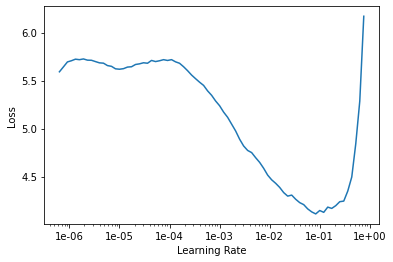

In [16]:
learn.lr_find()
learn.recorder.plot()

In [18]:
# Image.open(PATH_TO_IMG / "resc_2020@02@15@aCZsjDmo6s8Ovs0PulbGAzIT6uX8Izuwt8b06dLB.jpeg")

In [19]:
n_epochs = 8
lr = 5e-03

learn.fit_one_cycle(n_epochs, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.980298,1.485908,0.636998,01:47
1,1.495409,1.372574,0.669284,01:05
2,1.345254,1.241127,0.680628,01:05
3,1.240377,1.186038,0.687609,01:06
4,1.111572,1.103738,0.700698,01:05
5,1.009397,1.088921,0.693717,01:05
6,0.903722,1.079463,0.705934,01:05
7,0.783893,1.063547,0.709424,01:06


We have 46 classes in the data

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

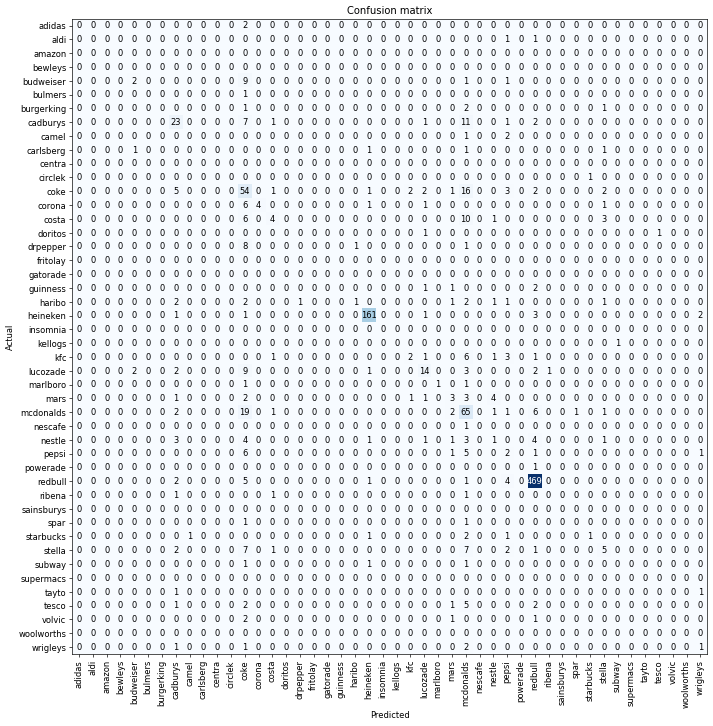

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# stage 2

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


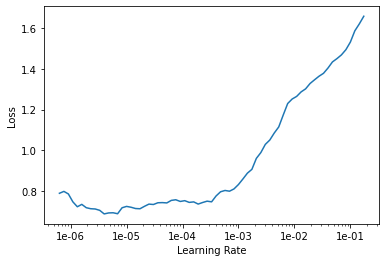

In [22]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [23]:
n_epochs = 8
lr = 1e-4
lr_end = 1e-5

learn.fit_one_cycle(n_epochs, slice(lr, lr_end))

epoch,train_loss,valid_loss,accuracy,time
0,0.790734,1.083896,0.714660,01:09
1,0.817114,1.109465,0.720768,01:09
2,0.783489,1.090966,0.712914,01:09
3,0.716003,1.091372,0.723386,01:09
4,0.645014,1.081004,0.727749,01:09
5,0.550388,1.108141,0.720768,01:09
6,0.504335,1.090095,0.728621,01:09
7,0.480296,1.098241,0.728621,01:08


In [27]:
learn.export("stage2_256.pkl")
learn.save("stage2_256")

# stage 3

In [10]:
batch_size = 32
img_size = (512, 512)

np.random.seed(273)
src = (ImageList.from_df(df_brands, cols="file", path=PATH_TO_IMG)
#        .use_partial_data(partial_pct)
       .split_from_df("is_valid")
       .label_from_df(cols="brands"))

tfms = get_transforms()
data = (src.transform(tfms, size=img_size, padding_mode ="zeros")
        .databunch(bs=batch_size).normalize(imagenet_stats))

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.load("stage2_256");

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


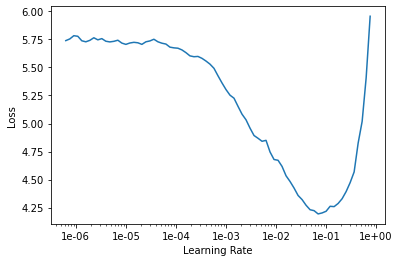

In [12]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [13]:
n_epochs = 8
lr = 2e-03

learn.fit_one_cycle(n_epochs, lr)

epoch,train_loss,valid_loss,accuracy,time
0,2.411141,1.705815,0.653578,02:40
1,1.505984,1.272546,0.692845,02:37
2,1.306798,1.174503,0.693717,02:39
3,1.103248,1.115085,0.705061,02:38
4,0.965094,1.082633,0.730366,02:39
5,0.784063,1.050829,0.732112,02:40
6,0.645794,1.070916,0.737347,02:39
7,0.558024,1.071157,0.740838,02:38


# stage 4

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


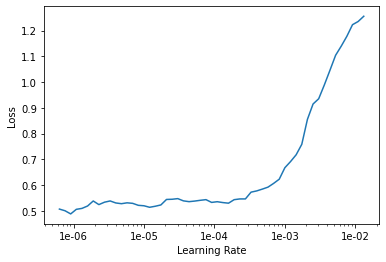

In [14]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [15]:
n_epochs = 8
lr = 1e-04
lr_end = 1e-05

learn.fit_one_cycle(n_epochs, slice(lr, lr_end))

epoch,train_loss,valid_loss,accuracy,time
0,0.547437,1.069968,0.741710,03:05
1,0.609657,1.069967,0.748691,03:04
2,0.598009,1.087576,0.733857,03:05
3,0.495293,1.082028,0.748691,03:05
4,0.406778,1.101500,0.739965,03:04
5,0.349248,1.097250,0.743455,03:04
6,0.279231,1.115229,0.747818,03:04
7,0.243976,1.110360,0.741710,03:05


In [16]:
learn.export("stage4_512")
learn.save("stage4_512")

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

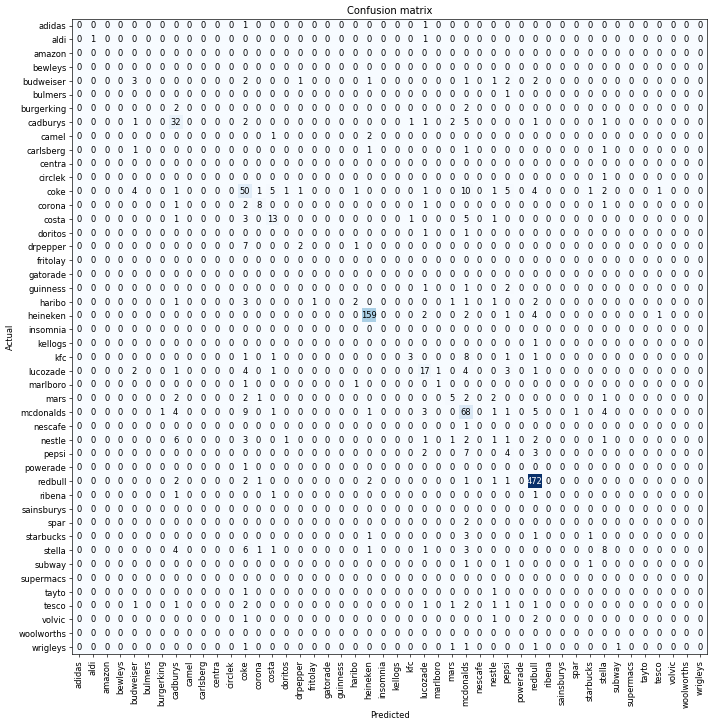

In [18]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)